In [1]:
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from NeuralNetwork.Network import Network
from NeuralNetwork.Layers.Input import Input
from NeuralNetwork.Layers.Dense import Dense
from NeuralNetwork.Activations.Sigmoid import Sigmoid
from NeuralNetwork.Losses.MSE import MSE
from NeuralNetwork.Metrics import Metric, Plot

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Предобработка данных

## Загрузка данных

In [5]:
df = pd.read_csv('Mushroom_dataset.csv', names=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'], header=None)
rows, columns = df.shape

## Описание данных

In [6]:
df.head()

class cap-shape cap-surface cap-color  bruises    odor gill-attachment  \
0  EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
1  EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
2  EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
3  EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
4  EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0      CROWDED    NARROW      WHITE    TAPERING    BULBOUS   
1      CROWDED    NARROW      WHITE    TAPERING    BULBOUS   
2      CROWDED    NARROW       PINK    TAPERING    BULBOUS   
3      CROWDED    NARROW       PINK    TAPERING    BULBOUS   
4      CROWDED    NARROW      BROWN    TAPERING    BULBOUS   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                   SMOOTH                   SMOOTH                  WHITE   
1                   SMOOTH                   SMOOTH                  WHITE   
2                   SMOOTH                   SMOOTH                  WHITE   
3                   SMOOTH                   SMOOTH                  WHITE   
4                   SMOOTH                   SMOOTH                  WHITE   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                  WHITE   PARTIAL      WHITE         ONE   PENDANT   
1                  WHITE   PARTIAL      WHITE         ONE   PENDANT   
2                  WHITE   PARTIAL      WHITE         ONE   PENDANT   
3                  WHITE   PARTIAL      WHITE         ONE   PENDANT   
4                  WHITE   PARTIAL      WHITE         ONE   PENDANT   

  spore-print-color population habitat  
0            PURPLE    SEVERAL   WOODS  
1             BROWN    SEVERAL   WOODS  
2            PURPLE    SEVERAL   WOODS  
3             BROWN    SEVERAL   WOODS  
4            PURPLE    SEVERAL   WOODS

In [7]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [9]:
for column in df.columns:
    print(f"{column}: ")
    print(df[column].unique())

class: 
['EDIBLE' 'POISONOUS']
cap-shape: 
['CONVEX' 'FLAT' 'BELL' 'SUNKEN' 'KNOBBED' 'CONICAL']
cap-surface: 
['SMOOTH' 'FIBROUS' 'SCALY' 'GROOVES']
cap-color: 
['WHITE' 'YELLOW' 'BROWN' 'GRAY' 'RED' 'PINK' 'PURPLE' 'GREEN' 'BUFF'
 'CINNAMON']
bruises: 
['BRUISES' 'NO']
odor: 
['ALMOND' 'ANISE' 'NONE' 'PUNGENT' 'CREOSOTE' 'FOUL' 'FISHY' 'SPICY'
 'MUSTY']
gill-attachment: 
['FREE' 'ATTACHED']
gill-spacing: 
['CROWDED' 'CLOSE']
gill-size: 
['NARROW' 'BROAD']
gill-color: 
['WHITE' 'PINK' 'BROWN' 'GRAY' 'BLACK' 'CHOCOLATE' 'PURPLE' 'GREEN' 'RED'
 'BUFF' 'YELLOW' 'ORANGE']
stalk-shape: 
['TAPERING' 'ENLARGING']
stalk-root: 
['BULBOUS' 'CLUB' 'ROOTED' 'EQUAL' '?']
stalk-surface-above-ring: 
['SMOOTH' 'FIBROUS' 'SILKY' 'SCALY']
stalk-surface-below-ring: 
['SMOOTH' 'SCALY' 'FIBROUS' 'SILKY']
stalk-color-above-ring: 
['WHITE' 'PINK' 'GRAY' 'BUFF' 'BROWN' 'RED' 'CINNAMON' 'YELLOW' 'ORANGE']
stalk-color-below-ring: 
['WHITE' 'PINK' 'GRAY' 'BUFF' 'BROWN' 'RED' 'YELLOW' 'CINNAMON' 'ORANGE']
veil-t

In [10]:
params = pd.DataFrame()
params.index = ['Количество', '% пропусков', 'Мощность', 'Мода', 'Частота']
for column in df.columns:
    params[column] = [len(df[column]), df[column].isna().sum() * 100 / len(df[column]), df[column].nunique(), df[column].mode().values[0], df[column].value_counts()[df[column].mode().values[0]]]

params = params.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(['Мощность'], slice(None))).apply(lambda x: ["background-color:limegreen" if i!=1 else "" for i in x], axis=1, subset=(['Мощность'], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(['% пропусков'], slice(None))).apply(lambda x: ["background-color:steelblue" if i<60 and i >= 30 else "" for i in x], axis=1, subset=(['% пропусков'], slice(None))).apply(lambda x: ["background-color:limegreen" if i<30 else "" for i in x], axis=1, subset=(['% пропусков'], slice(None)))
params

## Распределения

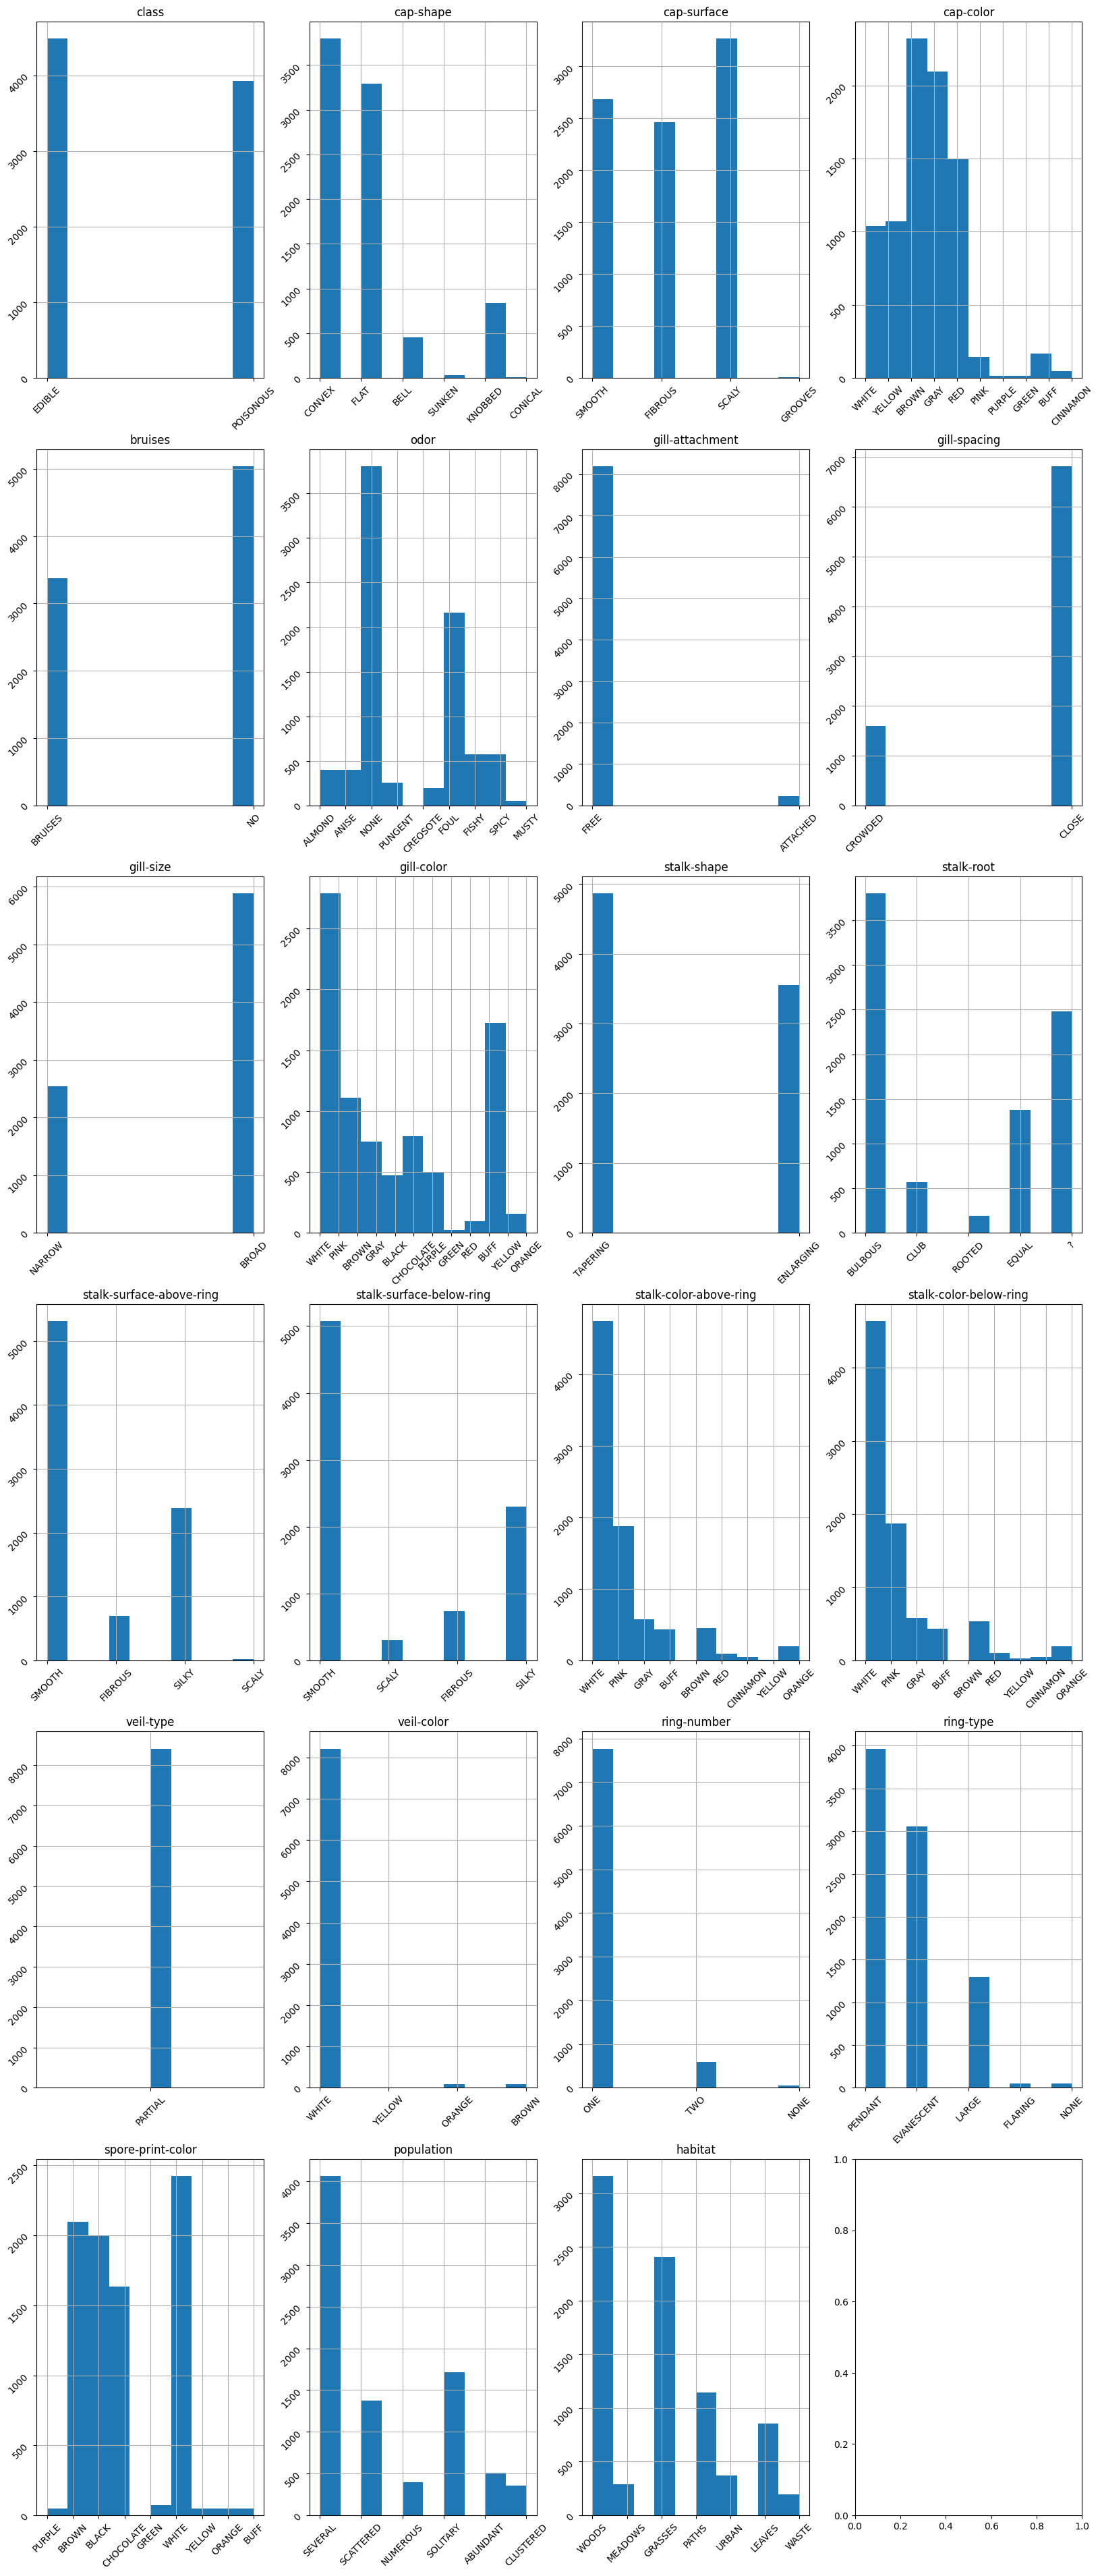

In [11]:
if columns % 4 == 0:
    f, ax = plt.subplots(int(columns // 4), 4, figsize=(20,int(columns // 4) * 8))
else:
    f, ax = plt.subplots(int(columns // 4) + 1, 4, figsize=(20,(int(columns // 4) + 1) * 8))

i = 0
j = 0
for column in df.columns:
    if j == 4:
        j = 0
        i += 1

    df[column].hist(ax=ax[i, j])
    ax[i, j].set_title(column)
    ax[i, j].tick_params(labelrotation=45)
    j += 1

## Баланс классов

<function matplotlib.pyplot.show(close=None, block=None)>

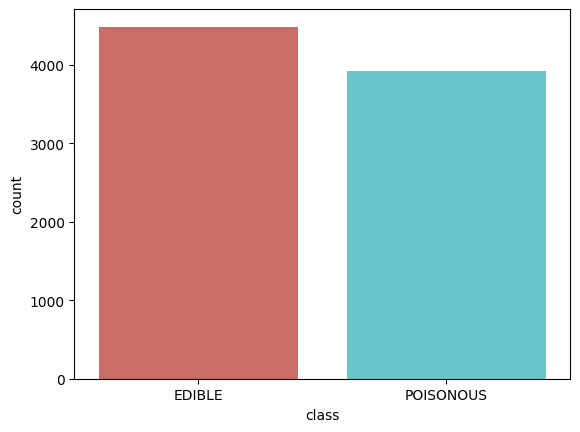

In [12]:
sns.countplot(x='class', data=pd.DataFrame(df['class']), palette='hls')
plt.show

## Обработка категориальных признаков

In [13]:
target_le = LabelEncoder()
df['class'] = target_le.fit_transform(df['class'])

for column in df.drop(columns=['class']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [14]:
df.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      0          2            3          8        0     0                1   
1      0          2            3          8        0     0                1   
2      0          2            3          8        0     0                1   
3      0          2            3          8        0     0                1   
4      0          2            3          8        0     0                1   

   gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  \
0             1          1          10            1           1   
1             1          1          10            1           1   
2             1          1           7            1           1   
3             1          1           7            1           1   
4             1          1           1            1           1   

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0                         3                         3                       7   
1                         3                         3                       7   
2                         3                         3                       7   
3                         3                         3                       7   
4                         3                         3                       7   

   stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                       7          0           2            1          4   
1                       7          0           2            1          4   
2                       7          0           2            1          4   
3                       7          0           2            1          4   
4                       7          0           2            1          4   

   spore-print-color  population  habitat  
0                  6           4        6  
1                  1           4        6  
2                  6           4        6  
3                  1           4        6  
4                  6           4        6

In [15]:
df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

## Важность признаков

In [16]:
rfc = RandomForestClassifier()
rfc.fit(df.drop(columns=['class']), df['class'])
imp = pd.Series(rfc.feature_importances_, df.drop(columns=['class']).columns[0:len(df.drop(columns=['class']).columns)]).sort_values()

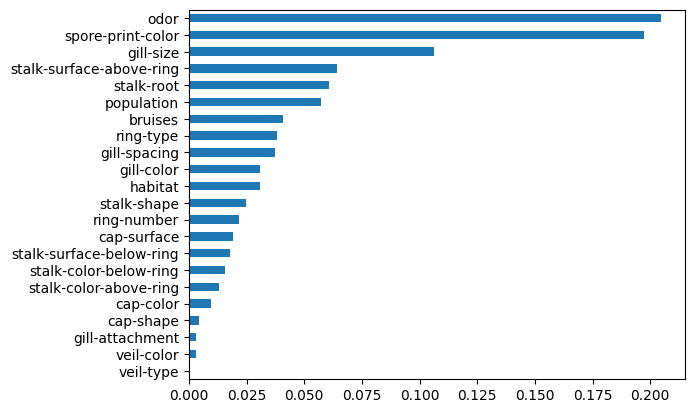

In [17]:
plt.figure()
imp.plot(kind='barh')
plt.show()

## Отбор признаков

In [18]:
df = df.drop(columns=['veil-type', 'veil-color', 'gill-attachment', 'cap-shape'])
rows, columns = df.shape

In [19]:
df.head()

class  cap-surface  cap-color  bruises  odor  gill-spacing  gill-size  \
0      0            3          8        0     0             1          1   
1      0            3          8        0     0             1          1   
2      0            3          8        0     0             1          1   
3      0            3          8        0     0             1          1   
4      0            3          8        0     0             1          1   

   gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  \
0          10            1           1                         3   
1          10            1           1                         3   
2           7            1           1                         3   
3           7            1           1                         3   
4           1            1           1                         3   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         3                       7                       7   
1                         3                       7                       7   
2                         3                       7                       7   
3                         3                       7                       7   
4                         3                       7                       7   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  6           4        6  
1            1          4                  1           4        6  
2            1          4                  6           4        6  
3            1          4                  1           4        6  
4            1          4                  6           4        6

In [20]:
df.columns

Index(['class', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-spacing',
       'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Разделение датасета для обучения

In [21]:
X = df.drop(columns=['class'])
Y = pd.get_dummies(df['class'])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [23]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [24]:
print(f"Train dataset shape: {x_train.shape}, {y_train.shape}")
print(f"Test dataset shape:  {x_test.shape}, {y_test.shape}")

Train dataset shape: (5891, 18), (5891, 2)
Test dataset shape:  (2525, 18), (2525, 2)


# Решение

In [25]:
model = Network() 
model.add(Input(18)) 
model.add(Dense(15, activation=Sigmoid))
model.add(Dense(10, activation=Sigmoid))
model.add(Dense(2, activation=Sigmoid)) 
model.compile(loss=MSE) 
model.fit(X_train=x_train, Y_train=y_train, epochs=100, learning_rate=.01) 
y_pred = model.predict(X=x_test)

100%|██████████| 5891/5891 [00:00<00:00, 7456.99it/s]


Epoch 0/100: loss=0.2545417513669886


100%|██████████| 5891/5891 [00:00<00:00, 8107.15it/s]


Epoch 1/100: loss=0.22052654122008514


100%|██████████| 5891/5891 [00:00<00:00, 8092.04it/s]


Epoch 2/100: loss=0.1816634372786038


100%|██████████| 5891/5891 [00:00<00:00, 7854.73it/s]


Epoch 3/100: loss=0.14339170495337128


100%|██████████| 5891/5891 [00:00<00:00, 8074.18it/s]


Epoch 4/100: loss=0.12098548116523232


100%|██████████| 5891/5891 [00:00<00:00, 8159.32it/s]


Epoch 5/100: loss=0.11057929624952131


100%|██████████| 5891/5891 [00:00<00:00, 7993.26it/s]


Epoch 6/100: loss=0.10400214608555478


100%|██████████| 5891/5891 [00:00<00:00, 8439.43it/s]


Epoch 7/100: loss=0.09870092008925475


100%|██████████| 5891/5891 [00:00<00:00, 8333.93it/s]


Epoch 8/100: loss=0.09358231322229028


100%|██████████| 5891/5891 [00:00<00:00, 8426.21it/s]


Epoch 9/100: loss=0.08733630602480427


100%|██████████| 5891/5891 [00:00<00:00, 8312.84it/s]


Epoch 10/100: loss=0.08330982360073222


100%|██████████| 5891/5891 [00:00<00:00, 8170.62it/s]


Epoch 11/100: loss=0.08011307530214486


100%|██████████| 5891/5891 [00:00<00:00, 8106.92it/s]


Epoch 12/100: loss=0.07734168404627959


100%|██████████| 5891/5891 [00:00<00:00, 8136.38it/s]


Epoch 13/100: loss=0.07499815101220289


100%|██████████| 5891/5891 [00:00<00:00, 8215.82it/s]


Epoch 14/100: loss=0.07298854327485822


100%|██████████| 5891/5891 [00:00<00:00, 8399.08it/s]


Epoch 15/100: loss=0.07118522051292123


100%|██████████| 5891/5891 [00:00<00:00, 8309.16it/s]


Epoch 16/100: loss=0.06944275598425377


100%|██████████| 5891/5891 [00:00<00:00, 8464.09it/s]


Epoch 17/100: loss=0.06756776710021266


100%|██████████| 5891/5891 [00:00<00:00, 8476.32it/s]


Epoch 18/100: loss=0.06468969586399989


100%|██████████| 5891/5891 [00:00<00:00, 8439.87it/s]


Epoch 19/100: loss=0.06098748582686228


100%|██████████| 5891/5891 [00:00<00:00, 7949.73it/s]


Epoch 20/100: loss=0.05774375454528507


100%|██████████| 5891/5891 [00:00<00:00, 8456.96it/s]


Epoch 21/100: loss=0.051098716327259826


100%|██████████| 5891/5891 [00:00<00:00, 8512.59it/s]


Epoch 22/100: loss=0.0403437913055725


100%|██████████| 5891/5891 [00:00<00:00, 8297.20it/s]


Epoch 23/100: loss=0.03495694149267759


100%|██████████| 5891/5891 [00:00<00:00, 8152.31it/s]


Epoch 24/100: loss=0.03135514545195115


100%|██████████| 5891/5891 [00:00<00:00, 8220.56it/s]


Epoch 25/100: loss=0.0282631623237461


100%|██████████| 5891/5891 [00:00<00:00, 8103.16it/s]


Epoch 26/100: loss=0.025225801814769768


100%|██████████| 5891/5891 [00:00<00:00, 7950.18it/s]


Epoch 27/100: loss=0.021654453282005794


100%|██████████| 5891/5891 [00:00<00:00, 8379.82it/s]


Epoch 28/100: loss=0.017510040244210694


100%|██████████| 5891/5891 [00:00<00:00, 8438.93it/s]


Epoch 29/100: loss=0.014357881033680514


100%|██████████| 5891/5891 [00:00<00:00, 8273.89it/s]


Epoch 30/100: loss=0.01226400885002829


100%|██████████| 5891/5891 [00:00<00:00, 8415.74it/s]


Epoch 31/100: loss=0.010630123581125127


100%|██████████| 5891/5891 [00:00<00:00, 8439.43it/s]


Epoch 32/100: loss=0.009408241882085687


100%|██████████| 5891/5891 [00:00<00:00, 8300.43it/s]


Epoch 33/100: loss=0.008559398916793672


100%|██████████| 5891/5891 [00:00<00:00, 8080.92it/s]


Epoch 34/100: loss=0.007929971834435893


100%|██████████| 5891/5891 [00:00<00:00, 8297.21it/s]


Epoch 35/100: loss=0.007429323412308488


100%|██████████| 5891/5891 [00:00<00:00, 8416.23it/s]


Epoch 36/100: loss=0.007015532954197688


100%|██████████| 5891/5891 [00:00<00:00, 8278.00it/s]


Epoch 37/100: loss=0.006664763947900708


100%|██████████| 5891/5891 [00:00<00:00, 8468.38it/s]


Epoch 38/100: loss=0.006360472260541579


100%|██████████| 5891/5891 [00:00<00:00, 8495.23it/s]


Epoch 39/100: loss=0.006086716422538896


100%|██████████| 5891/5891 [00:00<00:00, 8092.05it/s]


Epoch 40/100: loss=0.005807876144225234


100%|██████████| 5891/5891 [00:00<00:00, 8525.36it/s]


Epoch 41/100: loss=0.005497474741585757


100%|██████████| 5891/5891 [00:00<00:00, 8063.01it/s]


Epoch 42/100: loss=0.005210679456494066


100%|██████████| 5891/5891 [00:00<00:00, 6735.07it/s]


Epoch 43/100: loss=0.004942604163171017


100%|██████████| 5891/5891 [00:00<00:00, 7650.67it/s]


Epoch 44/100: loss=0.004682936945220661


100%|██████████| 5891/5891 [00:00<00:00, 7854.68it/s]


Epoch 45/100: loss=0.004453433194185504


100%|██████████| 5891/5891 [00:00<00:00, 8348.28it/s]


Epoch 46/100: loss=0.004267965934544437


100%|██████████| 5891/5891 [00:00<00:00, 8170.54it/s]


Epoch 47/100: loss=0.004117866112562159


100%|██████████| 5891/5891 [00:00<00:00, 6287.30it/s]


Epoch 48/100: loss=0.003991667665780702


100%|██████████| 5891/5891 [00:00<00:00, 7703.65it/s]


Epoch 49/100: loss=0.003882197540348007


100%|██████████| 5891/5891 [00:00<00:00, 7756.32it/s]


Epoch 50/100: loss=0.003785332971846647


100%|██████████| 5891/5891 [00:00<00:00, 7634.49it/s]


Epoch 51/100: loss=0.003698518331168148


100%|██████████| 5891/5891 [00:00<00:00, 8193.31it/s]


Epoch 52/100: loss=0.0036200058828974755


100%|██████████| 5891/5891 [00:00<00:00, 8278.78it/s]


Epoch 53/100: loss=0.0035485078192043777


100%|██████████| 5891/5891 [00:00<00:00, 8367.52it/s]


Epoch 54/100: loss=0.003483029412716399


100%|██████████| 5891/5891 [00:00<00:00, 7928.56it/s]


Epoch 55/100: loss=0.0034227792616074028


100%|██████████| 5891/5891 [00:00<00:00, 8006.58it/s]


Epoch 56/100: loss=0.0033671145710370384


100%|██████████| 5891/5891 [00:00<00:00, 8267.05it/s]


Epoch 57/100: loss=0.00331550465879091


100%|██████████| 5891/5891 [00:00<00:00, 7917.67it/s]


Epoch 58/100: loss=0.003267505329611699


100%|██████████| 5891/5891 [00:00<00:00, 8367.52it/s]


Epoch 59/100: loss=0.00322274033905502


100%|██████████| 5891/5891 [00:00<00:00, 8525.22it/s]


Epoch 60/100: loss=0.00318088770350822


100%|██████████| 5891/5891 [00:00<00:00, 8464.08it/s]


Epoch 61/100: loss=0.0031416694077303032


100%|██████████| 5891/5891 [00:00<00:00, 8381.64it/s]


Epoch 62/100: loss=0.0031048435366310043


100%|██████████| 5891/5891 [00:00<00:00, 8231.01it/s]


Epoch 63/100: loss=0.003070198164251659


100%|██████████| 5891/5891 [00:00<00:00, 8554.76it/s]


Epoch 64/100: loss=0.0030375465364373363


100%|██████████| 5891/5891 [00:00<00:00, 8392.76it/s]


Epoch 65/100: loss=0.0030067232208948694


100%|██████████| 5891/5891 [00:00<00:00, 8296.82it/s]


Epoch 66/100: loss=0.0029775809917594437


100%|██████████| 5891/5891 [00:00<00:00, 8344.17it/s]


Epoch 67/100: loss=0.0029499882800670145


100%|██████████| 5891/5891 [00:00<00:00, 8451.98it/s]


Epoch 68/100: loss=0.0029238270662602273


100%|██████████| 5891/5891 [00:00<00:00, 8463.68it/s]


Epoch 69/100: loss=0.002898991122384773


100%|██████████| 5891/5891 [00:00<00:00, 7263.16it/s]


Epoch 70/100: loss=0.002875384534159046


100%|██████████| 5891/5891 [00:00<00:00, 7947.59it/s]


Epoch 71/100: loss=0.002852920449417375


100%|██████████| 5891/5891 [00:00<00:00, 7766.58it/s]


Epoch 72/100: loss=0.0028315200114135027


100%|██████████| 5891/5891 [00:00<00:00, 7854.61it/s]


Epoch 73/100: loss=0.002811111444392482


100%|██████████| 5891/5891 [00:00<00:00, 8163.54it/s]


Epoch 74/100: loss=0.002791629265567641


100%|██████████| 5891/5891 [00:00<00:00, 8025.88it/s]


Epoch 75/100: loss=0.00277301360277576


100%|██████████| 5891/5891 [00:00<00:00, 8296.91it/s]


Epoch 76/100: loss=0.002755209601049461


100%|██████████| 5891/5891 [00:00<00:00, 7658.35it/s]


Epoch 77/100: loss=0.002738166904441822


100%|██████████| 5891/5891 [00:01<00:00, 4880.17it/s]


Epoch 78/100: loss=0.0027218392018777218


100%|██████████| 5891/5891 [00:01<00:00, 4048.70it/s]


Epoch 79/100: loss=0.0027061838277477783


100%|██████████| 5891/5891 [00:01<00:00, 5238.95it/s]


Epoch 80/100: loss=0.0026911614095180207


100%|██████████| 5891/5891 [00:01<00:00, 5151.55it/s]


Epoch 81/100: loss=0.00267673555588676


100%|██████████| 5891/5891 [00:01<00:00, 4462.78it/s]


Epoch 82/100: loss=0.0026628725800456905


100%|██████████| 5891/5891 [00:00<00:00, 5935.02it/s]


Epoch 83/100: loss=0.0026495412534421905


100%|██████████| 5891/5891 [00:00<00:00, 6979.86it/s]


Epoch 84/100: loss=0.002636712586132361


100%|██████████| 5891/5891 [00:00<00:00, 7318.02it/s]


Epoch 85/100: loss=0.0026243596303892397


100%|██████████| 5891/5891 [00:00<00:00, 7441.78it/s]


Epoch 86/100: loss=0.0026124573047093596


100%|██████████| 5891/5891 [00:00<00:00, 8320.62it/s]


Epoch 87/100: loss=0.0026009822357616493


100%|██████████| 5891/5891 [00:00<00:00, 7948.31it/s]


Epoch 88/100: loss=0.0025899126161608357


100%|██████████| 5891/5891 [00:00<00:00, 8308.92it/s]


Epoch 89/100: loss=0.0025792280762320127


100%|██████████| 5891/5891 [00:00<00:00, 8296.81it/s]


Epoch 90/100: loss=0.0025689095681754657


100%|██████████| 5891/5891 [00:00<00:00, 7887.01it/s]


Epoch 91/100: loss=0.002558939261246618


100%|██████████| 5891/5891 [00:00<00:00, 8625.23it/s]


Epoch 92/100: loss=0.0025493004467417187


100%|██████████| 5891/5891 [00:00<00:00, 8285.71it/s]


Epoch 93/100: loss=0.002539977451731447


100%|██████████| 5891/5891 [00:00<00:00, 8550.10it/s]


Epoch 94/100: loss=0.0025309555606133904


100%|██████████| 5891/5891 [00:00<00:00, 8347.95it/s]


Epoch 95/100: loss=0.0025222209436673673


100%|██████████| 5891/5891 [00:00<00:00, 8250.35it/s]


Epoch 96/100: loss=0.0025137605918929672


100%|██████████| 5891/5891 [00:00<00:00, 8320.24it/s]


Epoch 97/100: loss=0.0025055622574939626


100%|██████████| 5891/5891 [00:00<00:00, 8476.27it/s]


Epoch 98/100: loss=0.0024976143994463406


100%|██████████| 5891/5891 [00:00<00:00, 8504.61it/s]

Epoch 99/100: loss=0.002489906133650552


In [26]:
pred = list()
true = list() 
for i in range(len(y_pred)): 
    pred.append(np.argmax(y_pred[i]))
    true.append(np.argmax(y_test[i]))
true = target_le.inverse_transform(true)
pred = target_le.inverse_transform(pred)

# Результаты

## История обучения

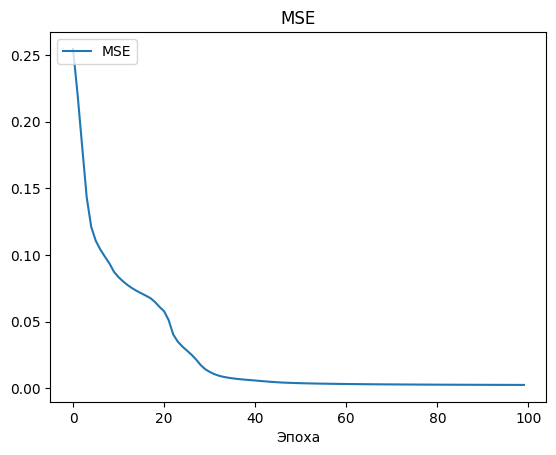

In [27]:
Plot.plot_history_trend(history=model.history, metric='MSE') 

## Метрики

In [28]:
Metric.print_classification_metrics(y_true=true, y_pred=pred)

           POISONOUS    EDIBLE
Accuracy    0.998416  0.998416
Precision   0.996593  1.000000
Recall      1.000000  0.997048
F1 score    0.998294  0.998522


## ROC-кривая

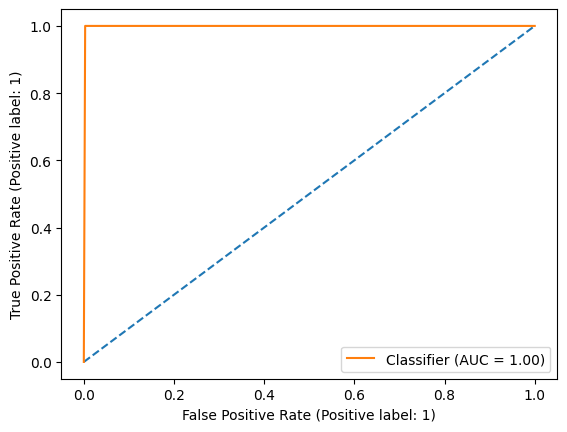

In [29]:
Plot.plot_roc_curve(y_true=target_le.transform(true), y_pred=target_le.transform(pred), labels=[1]) 

## Матрица ошибок

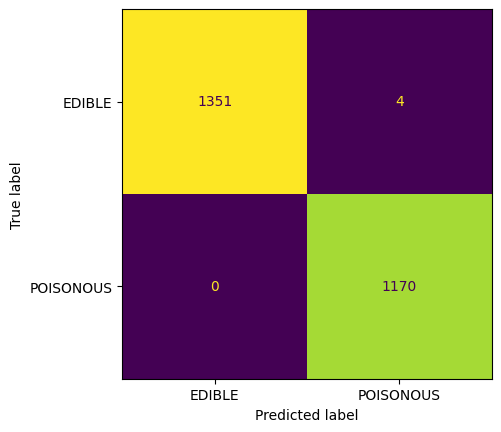

In [30]:
Plot.plot_confusion_matrix(y_true=true, y_pred=pred) 